<a href="https://colab.research.google.com/github/PaletteofDesign/kmeans/blob/main/kmeans_and_cluster_comp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [3]:
f = '/content/cust_seg.csv'
df = pd.read_csv(f)
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [4]:
df.rename(columns={'Customer Id': 'Customer_ID', 'Years Employed': 'Years_Employed', 
                   'Card Debt': 'Card_Debt', 'Other Debt': 'Other_Debt', 
                   'DebtIncomeRatio': 'Debt_Income_Ratio'},inplace=True)
df.head()

,Unnamed: 0,Customer_ID,Age,Edu,Years_Employed,Income,Card_Debt,Other_Debt,Defaulted,Debt_Income_Ratio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [5]:
df.drop(columns='Unnamed: 0',inplace=True)
df.head()

,Customer_ID,Age,Edu,Years_Employed,Income,Card_Debt,Other_Debt,Defaulted,Debt_Income_Ratio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [6]:
df.set_index('Customer_ID',inplace=True)

In [7]:
df.describe()

,Age,Edu,Years_Employed,Income,Card_Debt,Other_Debt,Defaulted,Debt_Income_Ratio
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [8]:
df.nunique()

Age                   37
Edu                    5
Years_Employed        33
Income               129
Card_Debt            727
Other_Debt           788
Defaulted              2
Debt_Income_Ratio    245
dtype: int64

In [9]:
df.isnull().sum()

Age                    0
Edu                    0
Years_Employed         0
Income                 0
Card_Debt              0
Other_Debt             0
Defaulted            150
Debt_Income_Ratio      0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 1 to 850
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                850 non-null    int64  
 1   Edu                850 non-null    int64  
 2   Years_Employed     850 non-null    int64  
 3   Income             850 non-null    int64  
 4   Card_Debt          850 non-null    float64
 5   Other_Debt         850 non-null    float64
 6   Defaulted          700 non-null    float64
 7   Debt_Income_Ratio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 59.8 KB


In [11]:
zero = df['Defaulted']==0
df[zero].head()

,Age,Edu,Years_Employed,Income,Card_Debt,Other_Debt,Defaulted,Debt_Income_Ratio
Customer_ID,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2
7,38,2,4,56,0.442,0.454,0.0,1.6


In [12]:
df.dropna(inplace=True)

In [13]:
df['Defaulted'].value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [14]:
df.isna().sum()

Age                  0
Edu                  0
Years_Employed       0
Income               0
Card_Debt            0
Other_Debt           0
Defaulted            0
Debt_Income_Ratio    0
dtype: int64

In [15]:
df.shape

(700, 8)

In [16]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

We will use customer age, education years of employment, income, debt, whether they defaulted, and debt: income ratio to group them into segments.

In [17]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
df['cluster'] = kmeans.labels_

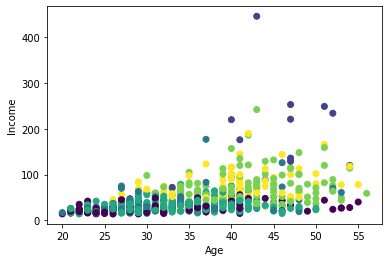

In [19]:
plt.scatter(df['Age'], df['Income'], c=df['cluster'])
plt.xlabel('Age')
plt.ylabel('Income');

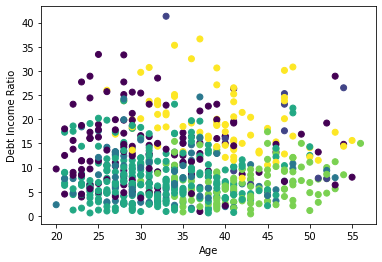

In [20]:
plt.scatter(df['Age'], df['Debt_Income_Ratio'], c=df['cluster'])
plt.xlabel('Age')
plt.ylabel('Debt Income Ratio');

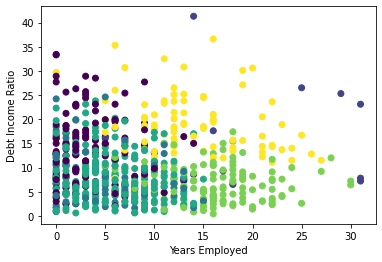

In [21]:
plt.scatter(df['Years_Employed'], df['Debt_Income_Ratio'], c = df['cluster'])
plt.xlabel('Years Employed')
plt.ylabel('Debt Income Ratio');

In [22]:
df['cluster'].value_counts()

3    267
0    134
4    130
5     81
2     77
1     11
Name: cluster, dtype: int64

In [23]:
seg1 = df[df['cluster'] == 0]
seg2 = df[df['cluster'] == 1]
seg3 = df[df['cluster'] == 2]
seg4 = df[df['cluster'] == 3]
seg5 = df[df['cluster'] == 4]
seg6 = df[df['cluster'] == 5]

In [24]:
cust_segs = [seg1, seg2, seg3, seg4, seg5, seg6]
for segment in cust_segs:
  print(segment.describe())

              Age         Edu  ...  Debt_Income_Ratio  cluster
count  134.000000  134.000000  ...         134.000000    134.0
mean    31.380597    1.619403  ...          13.675373      0.0
std      7.893840    0.691460  ...           6.984757      0.0
min     20.000000    1.000000  ...           0.900000      0.0
25%     25.000000    1.000000  ...           8.400000      0.0
50%     29.000000    2.000000  ...          13.200000      0.0
75%     36.000000    2.000000  ...          17.275000      0.0
max     55.000000    4.000000  ...          33.400000      0.0

[8 rows x 9 columns]
             Age        Edu  ...  Debt_Income_Ratio  cluster
count  11.000000  11.000000  ...          11.000000     11.0
mean   45.636364   2.181818  ...          17.118182      1.0
std     6.054300   1.250454  ...          11.066871      0.0
min    33.000000   1.000000  ...           6.500000      1.0
25%    42.000000   1.000000  ...           7.750000      1.0
50%    47.000000   2.000000  ...          16.

In [25]:
age_means = [np.mean(segment['Age']) for segment in cust_segs]
income_means = [np.mean(segment['Income']) for segment in cust_segs]
debtincomeratio_means = [np.mean(segment['Debt_Income_Ratio']) for segment in cust_segs]

In [26]:
summary_df = pd.DataFrame({'Cust Segment': ['seg1', 'seg2', 'seg3', 'seg4', 'seg5', 'seg6'], 'Age Means': age_means, 
                           'Income Means': income_means, 'Debt Income Ratio Means': debtincomeratio_means})

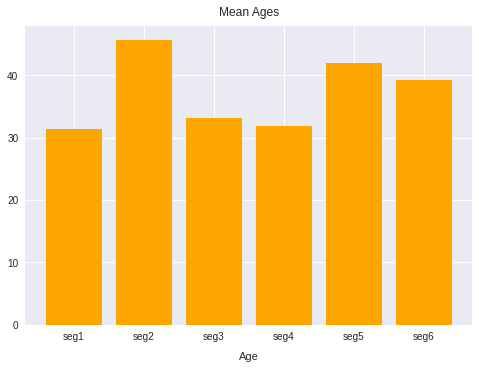

In [27]:
plt.style.use('seaborn')
plt.bar(summary_df['Cust Segment'], summary_df['Age Means'], color='orange')
plt.xlabel('Age', labelpad=10)
plt.title('Mean Ages', pad=10);

Seg 3 and 4 have the highest mean age. 

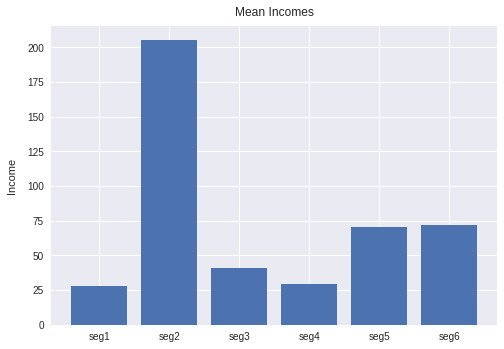

In [28]:
plt.style.use('seaborn')
plt.bar(summary_df['Cust Segment'], summary_df['Income Means'])
plt.ylabel('Income', labelpad=10)
plt.title('Mean Incomes', pad=10);

Seg 3 has the highest mean income compared to the rest of the segments.

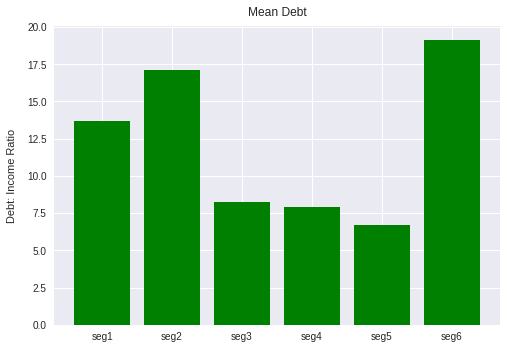

In [29]:
plt.style.use('seaborn')
plt.bar(summary_df['Cust Segment'], summary_df['Debt Income Ratio Means'], color='green')
plt.ylabel('Debt: Income Ratio', labelpad=10)
plt.title('Mean Debt', pad=10);

Seg 1 and 6 have the similar debt to income ratios. Seg 4 has the lowest debt to income ratio.

## Clustering Comparison Exercise Part 1

Use KMeans, Hierarchical Clustering, and DBSCAN to create various customer segments. Make sure to be able to back up the number of clusters you choose for the algorithms that you select the number of clusters.

# KMeans

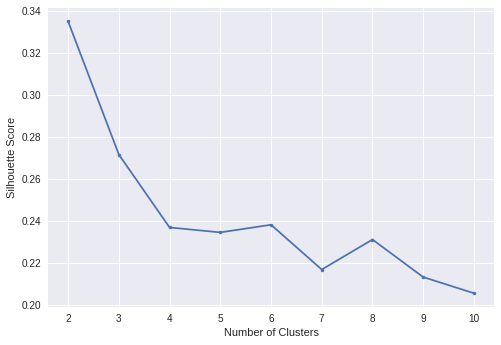

In [46]:
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
# Visualize scores
plt.style.use('seaborn')
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [50]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [51]:
df['kmeans_cluster'] = kmeans.labels_

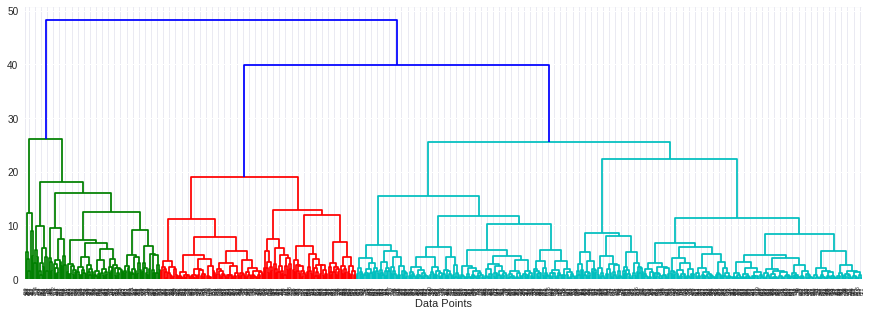

In [47]:
plt.figure(figsize=(15,5))
sch.dendrogram(sch.linkage(scaled_df, method='ward'))
plt.xlabel('Data Points');

In [61]:
df['hc_cluster'] = hc.labels_

## Hierarchical Clustering

In [62]:
hc = AgglomerativeClustering(n_clusters = 3)
hc.fit(scaled_df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

## DBSCAN 

In [63]:
dbs = DBSCAN(eps = 0.5, min_samples = 5).fit(scaled_df)

In [64]:
df['dbs_cluster'] = dbs.labels_

## Part 2

Which clustering algorithm is best for this data and why?

In [73]:
print(f'Silhouette Score for kmeans: {silhouette_score(scaled_df, kmeans.labels_)}')
print('--------------------------------------------------')
print(f'Silhouette Score for hc: {silhouette_score(scaled_df, hc.labels_)}')
print('--------------------------------------------------')
print(f'Silhouette Score for dbs: {silhouette_score(scaled_df, dbs.labels_)}')
print('--------------------------------------------------')

Silhouette Score for kmeans: 0.33496643365707623
--------------------------------------------------
Silhouette Score for hc: 0.26443271651400624
--------------------------------------------------
Silhouette Score for dbs: -0.28649351883732704
--------------------------------------------------


The best cluster according to the previous data is going to be kmeans
This is due to the density of the clusters and the optimal space between each
cluster.